The purpose of my two data-sets here is to see if there's any way to measure the greatest determining factor in loan approvals based on the data gathered. There's an accepted and rejected data-set that documented all approvals and rejections from 2007 to 2018. I'll be assuming that not all of 2007 and 2018 are accounted for. I begin by reading the 2 data-sets into dataframes.

In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv("accepted_2007_to_2018Q4.csv")
pd.options.display.max_rows=999
data1.loc[1]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                                                                                     68355089
member_id                                                                                   NaN
loan_amnt                                                                               24700.0
funded_amnt                                                                             24700.0
funded_amnt_inv                                                                         24700.0
term                                                                                  36 months
int_rate                                                                                  11.99
installment                                                                              820.28
grade                                                                                         C
sub_grade                                                                                    C1
emp_title                               

In [3]:
data2=pd.read_csv("rejected_2007_to_2018Q4.csv")
pd.options.display.max_rows=999
data2.loc[1]

Amount Requested                    1000.0
Application Date                2007-05-26
Loan Title              Consolidating Debt
Risk_Score                           703.0
Debt-To-Income Ratio                   10%
Zip Code                             010xx
State                                   MA
Employment Length                 < 1 year
Policy Code                            0.0
Name: 1, dtype: object

The 'accepted' data-set has many more items tracked than the 'rejected' one. I'll make a new dataframe that only includes measurements from the 'accepted' data-set that overlap ones from 'rejected', keeping all of the ones from 'rejected' for now. From here now on, I'll be referring to the 'accepted' data-set as data1 and the 'rejected' data-set as data2.

In [4]:
data1=data1[['loan_amnt','issue_d','title','fico_range_low','dti','zip_code','addr_state','emp_length','policy_code']]

I need to combine the two data-sets, so I'll start by checking the types to see if they can cleanly be combined.

In [5]:
data1.dtypes

loan_amnt         float64
issue_d            object
title              object
fico_range_low    float64
dti               float64
zip_code           object
addr_state         object
emp_length         object
policy_code       float64
dtype: object

In [6]:
data2.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

'Debt-To-Income Ratio' is of type 'object' while 'dti' is of type 'float64'. I check the unique values of 'Debt-To-Income Ratio' to see why it isn't of type 'float64'.

In [7]:
data2['Debt-To-Income Ratio'].unique()

array(['10%', '38.64%', '9.43%', ..., '1986.02%', '1154.55%', '21215.75%'],
      dtype=object)

I can see that there are '$' symbols attached to each value. I take those out, and check the types again.

In [8]:
nosymb=data2['Debt-To-Income Ratio'].str.replace('%','')
data2['Debt-To-Income Ratio']=pd.to_numeric(nosymb)

In [9]:
data2.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

Now that the values are of the same types, I can start readying the data-sets for being combined. The names of the columns in the data1 are heavily abbreviated and less easy to read than the columns from data2. I'll rename the columns from data1 with the names from data2.

In [10]:
new_names=data2.columns
old_names=data1.columns

data1 = data1.rename(columns=dict(zip(old_names,new_names)))
data1.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio    float64
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

Next I'll be taking a look at the dates. The ones from data1 are formatted as 'Dec-2015' for example while the ones from data2 '2007-05-26'. I'll be reformatting both into quarters for easier evaluation later.

In [11]:
data1['Application Date']=pd.to_datetime(data1['Application Date'],format="%b-%Y")
data1['Application Date']=pd.PeriodIndex(data1['Application Date'],freq='Q')

In [12]:
data2['Application Date']=pd.to_datetime(data2['Application Date'],format="%Y-%m-%d")
data2['Application Date']=pd.PeriodIndex(data2['Application Date'],freq='Q')

The final step will be to make two new columns for each data-set to help differentiate which rows represent an approved loan and which applications were rejected. I'll be giving accepted applications a value of 1 and rejected applications a value of 0. The new column for each data-set will be called 'Accepted'.

In [13]:
data1['Accepted']=1
data2['Accepted']=0

We're now ready to combine the two data-sets. The combined data-set will be referred to as data_final going forward.

In [14]:
data_final=data2.append(data1,ignore_index=True)

To make 'Employment Length' easier to graph, I'll be replacing all of the string values with integers.

In [15]:
temp=data_final[data_final['Employment Length']=='10+ years']
temp=pd.to_numeric(temp['Employment Length'].str.replace('\+ years',''))
temp2=data_final[data_final['Employment Length']=='<1 year']
temp3=data_final[data_final['Employment Length']=='1 year']
temp2=pd.to_numeric(temp2['Employment Length'].str.replace('<1 year',''))
temp3=pd.to_numeric(temp3['Employment Length'].str.replace(' year',''))
tempb2=data_final[data_final['Employment Length']=='2 years']
tempb3=data_final[data_final['Employment Length']=='3 years']
tempb4=data_final[data_final['Employment Length']=='4 years']
tempb5=data_final[data_final['Employment Length']=='5 years']
tempb6=data_final[data_final['Employment Length']=='6 years']
tempb7=data_final[data_final['Employment Length']=='7 years']
tempb8=data_final[data_final['Employment Length']=='8 years']
tempb9=data_final[data_final['Employment Length']=='9 years']
tempb2=pd.to_numeric(tempb2['Employment Length'].str.replace(' years', ''))
tempb3=pd.to_numeric(tempb3['Employment Length'].str.replace(' years', ''))
tempb4=pd.to_numeric(tempb4['Employment Length'].str.replace(' years', ''))
tempb5=pd.to_numeric(tempb5['Employment Length'].str.replace(' years', ''))
tempb6=pd.to_numeric(tempb6['Employment Length'].str.replace(' years', ''))
tempb7=pd.to_numeric(tempb7['Employment Length'].str.replace(' years', ''))
tempb8=pd.to_numeric(tempb8['Employment Length'].str.replace(' years', ''))
tempb9=pd.to_numeric(tempb9['Employment Length'].str.replace(' years', ''))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11860/783076285.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  temp=pd.to_numeric(temp['Employment Length'].str.replace('\+ years',''))


In [16]:
df1 = temp.append(temp2)
df2 = df1.append(temp3)
df3 = df2.append(tempb2)
df4 = df3.append(tempb3)
df5 = df4.append(tempb4)
df6 = df5.append(tempb5)
df7 = df6.append(tempb6)
df8 = df7.append(tempb7)
df9 = df8.append(tempb8)
df = df9.append(tempb9)

In [17]:
data_final['Employment_Length']=df

In [18]:
data_final=data_final.drop('Employment Length',axis=1)

In [19]:
data_final['Employment_Length']=data_final['Employment_Length'].fillna(0)

Next, I'll start checking to see if there are any outliers that need to be eliminated by graphing them agains the number of approved loans.

<AxesSubplot:xlabel='Accepted', ylabel='Amount Requested'>

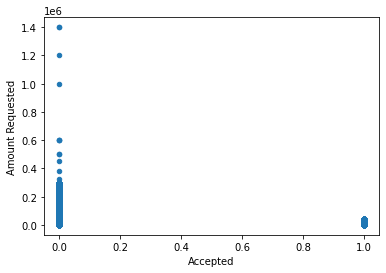

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize']=10000
data_final.plot(x='Accepted',y='Amount Requested',kind='scatter')

Loan amounts above 300,000 were rarely requested.

<AxesSubplot:xlabel='Accepted', ylabel='Risk_Score'>

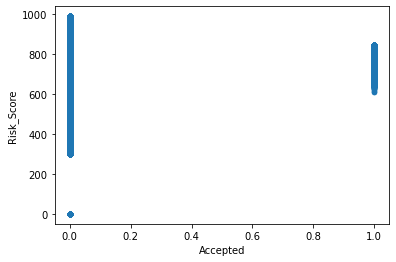

In [28]:
data_final.plot(x='Accepted',y='Risk_Score',kind='scatter')

Risk scores below 300 are rare as well.

<AxesSubplot:xlabel='Accepted', ylabel='Debt-To-Income Ratio'>

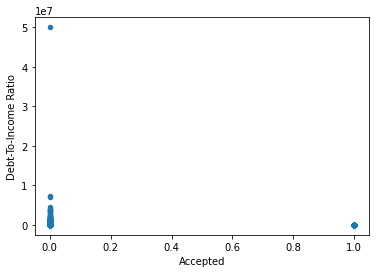

In [29]:
data_final.plot(x='Accepted',y='Debt-To-Income Ratio',kind='scatter')

A dti above 5,000,000 is irrelevant.

<AxesSubplot:xlabel='Accepted', ylabel='Policy Code'>

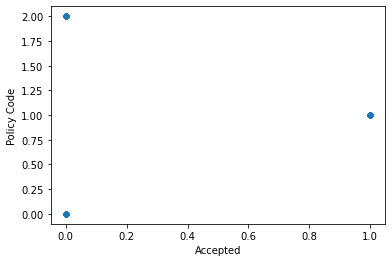

In [30]:
data_final.plot(x='Accepted',y='Policy Code',kind='scatter')

The policy code itself seems irrelevant here.

<AxesSubplot:xlabel='Accepted', ylabel='Employment_Length'>

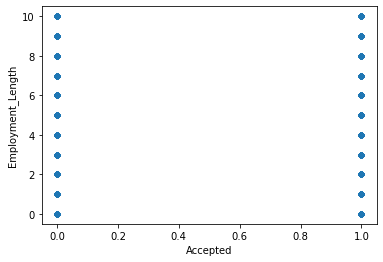

In [31]:
data_final.plot(x='Accepted',y='Employment_Length',kind='scatter')

Looks like people from all employment lengths were accepted. That's all I can graph directly, so I'll begin removing the outliers.

In [20]:
data_final=data_final.drop('Policy Code',axis=1)

In [21]:
test_df=data_final[data_final['Amount Requested']<300000]

In [22]:
test_df.head

<bound method NDFrame.head of           Amount Requested Application Date                        Loan Title  \
0                   1000.0           2007Q2  Wedding Covered but No Honeymoon   
1                   1000.0           2007Q2                Consolidating Debt   
2                  11000.0           2007Q2       Want to consolidate my debt   
3                   6000.0           2007Q2                           waksman   
4                   1500.0           2007Q2                            mdrigo   
...                    ...              ...                               ...   
29909435           24000.0           2016Q4                  Home improvement   
29909436           24000.0           2016Q4                Debt consolidation   
29909437           40000.0           2016Q4                               NaN   
29909438           24000.0           2016Q4                Debt consolidation   
29909439           14000.0           2016Q4                               NaN  

<AxesSubplot:xlabel='Accepted', ylabel='Amount Requested'>

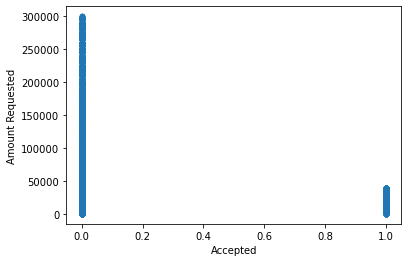

In [36]:
test_df.plot(x='Accepted',y='Amount Requested',kind='scatter')

In [23]:
test_df=test_df.dropna()

Now I'll drop the null values from the data-set.

In [24]:
data_final=test_df

In [25]:
data_final.head

<bound method NDFrame.head of           Amount Requested Application Date                        Loan Title  \
0                   1000.0           2007Q2  Wedding Covered but No Honeymoon   
1                   1000.0           2007Q2                Consolidating Debt   
2                  11000.0           2007Q2       Want to consolidate my debt   
3                   6000.0           2007Q2                           waksman   
4                   1500.0           2007Q2                            mdrigo   
...                    ...              ...                               ...   
29909433           16000.0           2016Q4                  Medical expenses   
29909434           24000.0           2016Q4           Credit card refinancing   
29909435           24000.0           2016Q4                  Home improvement   
29909436           24000.0           2016Q4                Debt consolidation   
29909438           24000.0           2016Q4                Debt consolidation  

Even after dropping the null values, data_final still has over 11,000,000 values.

In [26]:
data_final['Debt-To-Income Ratio'].max()

50000031.49

In [27]:
data_final['Debt-To-Income Ratio'].min()

-1.0

In [28]:
data_final=data_final[data_final['Debt-To-Income Ratio']<5000000]

<AxesSubplot:xlabel='Accepted', ylabel='Debt-To-Income Ratio'>

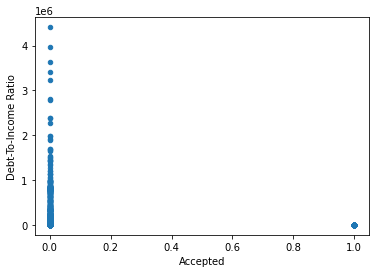

In [43]:
data_final.plot(x='Accepted',y='Debt-To-Income Ratio',kind='scatter')

In [29]:
data_final=data_final[data_final['Risk_Score']>300]

<AxesSubplot:xlabel='Accepted', ylabel='Risk_Score'>

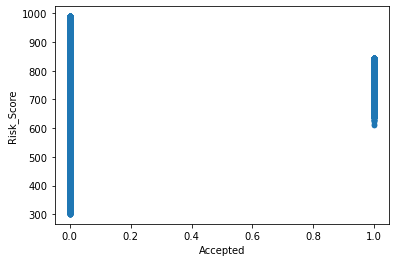

In [45]:
data_final.plot(x='Accepted',y='Risk_Score',kind='scatter')

Now that the outliers from the integer based values have been dropped, let's take a smaller sample of the data. Even 1/10th of the original size will be plenty for the learning model.

In [30]:
sample_test_df=data_final.sample(frac=.1)
sample_test_df.head

<bound method NDFrame.head of           Amount Requested Application Date               Loan Title  \
7895694             8000.0           2014Q1                   moving   
19758627            5000.0           2017Q4         Medical expenses   
27738728           24000.0           2015Q4       Debt consolidation   
28282802           25000.0           2017Q3  Credit card refinancing   
6822550            20000.0           2018Q3                    Other   
...                    ...              ...                      ...   
10845805            1000.0           2018Q1           Major purchase   
8362378            25000.0           2014Q2       debt_consolidation   
28805338           28000.0           2014Q4       Debt consolidation   
7150331            10000.0           2013Q2            Consolidation   
28039815            8500.0           2015Q1  Credit card refinancing   

          Risk_Score  Debt-To-Income Ratio Zip Code State  Accepted  \
7895694        518.0              

In [31]:
data_final=sample_test_df

The data is clean, so I'll export it for use in a different notebook. This large data-set has pushed this current notebook to its limit.

In [32]:
data_final.to_csv('cleaned_data.csv')